#### Muhammed Cihat ÜNAL 16050111002
#### Berkan YILDIRIM 16050111025
#### Muratcan YILDIZ 16050111036
#### Gürkan ALTINTAŞ 16050111019

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.decomposition import PCA # Needed for dimension reduction

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt # Plotting 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score


import seaborn as sns; sns.set()  # for plot styling
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Load and Investigate Data

 I will be using diabetes dataset for this demonstration

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.columns.unique()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* In our dataset, we have no null and min-zero values, So we don't need to do Data cleaning

## Outlier Removal by using Z-Score

Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers

#### Outlier Detection

In [8]:
from scipy import stats

z = np.abs(stats.zscore(df))
print(z)

[[0.63994726 0.84832379 0.14964075 ... 0.46849198 1.4259954  1.36589591]
 [0.84488505 1.12339636 0.16054575 ... 0.36506078 0.19067191 0.73212021]
 [1.23388019 1.94372388 0.26394125 ... 0.60439732 0.10558415 1.36589591]
 ...
 [0.3429808  0.00330087 0.14964075 ... 0.68519336 0.27575966 0.73212021]
 [0.84488505 0.1597866  0.47073225 ... 0.37110101 1.17073215 1.36589591]
 [0.84488505 0.8730192  0.04624525 ... 0.47378505 0.87137393 0.73212021]]


Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.
threshold = 3

In [9]:
threshold = 3
print(np.where(z > threshold))

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753], dtype=int64), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4], dtype=int64))


Don’t be confused by the results. The first array contains the list of row numbers and second array respective column numbers, which mean z[4][6] have a Z-score higher than 3.

In [10]:
z[4][6]

5.484909100466951

#### Outlier Removal

Previously, we saw how one can detect the outlier using Z-score but now we want to remove or filter the outliers and get the clean data. This can be done with just one line code as we have already calculated the Z-score.

In [11]:
# Before removal
df.shape

(768, 9)

In [12]:
# Remove outlier
df = df[(z < threshold).all(axis=1)]

# After removal
df.shape

(688, 9)

## Dimensionality Reduction with PCA

In [13]:
# X variable contains all columns from dataset but "class" column
X = df.drop('Outcome', axis=1).values

# y variables contains only "class" column
y = df['Outcome'].values

We can clearly see that we have 10 feature in out dataset. I wish I could visualize each point in 10-dimensional space, but I just can’t. So, we need to find a way to reduce the dimensionality of our data.

The naive thing to do would be to check the correlation of some of the features and hope that some of them are repeats (can be removed). Let’s try it out and display the correlation matrix.

In [14]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.156470,0.229881,-0.097721,-0.080638,0.043549,0.015522,0.569787,0.226382
Glucose,0.156470,1.000000,0.240560,0.008577,0.272654,0.196665,0.104521,0.266930,0.478614
BloodPressure,0.229881,0.240560,1.000000,0.005076,-0.070572,0.274707,0.032757,0.354391,0.182521
SkinThickness,-0.097721,0.008577,0.005076,1.000000,0.462778,0.383819,0.153530,-0.150039,0.056662
Insulin,-0.080638,0.272654,-0.070572,0.462778,1.000000,0.165428,0.183184,-0.081003,0.110062
BMI,0.043549,0.196665,0.274707,0.383819,0.165428,1.000000,0.125714,0.059980,0.298056
DiabetesPedigreeFunction,0.015522,0.104521,0.032757,0.153530,0.183184,0.125714,1.000000,0.060663,0.213872
Age,0.569787,0.266930,0.354391,-0.150039,-0.081003,0.059980,0.060663,1.000000,0.246290
Outcome,0.226382,0.478614,0.182521,0.056662,0.110062,0.298056,0.213872,0.246290,1.000000


As we can see, there are features with barely high correalation. The boxes with red ground shows us the high correalation rate. To illustrate, The correlation between Age and Pregnencies is pretty high (56%)

### Standardize Data

In [15]:
X = StandardScaler().fit_transform(X) # normalizing the data 

In [16]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)

In our last experiment we were removing variables that were highly correlated. With PCA, however, we are trying to compute new characteristics (principal components) that compacts the information into certain dimensions.

Most of the variance is put in the first component. What is left is put in component 2, then component 3, etc.

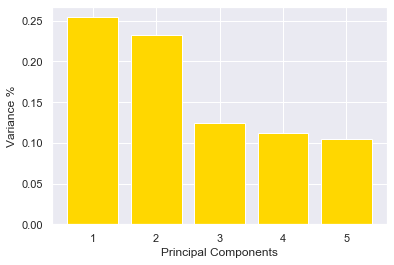

In [17]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents, columns=['PCA-%i' % i for i in range(5)])

In [18]:
PCA_components.head()

,PCA-0,PCA-1,PCA-2,PCA-3,PCA-4
0,1.578058,-0.196174,0.313162,0.476384,0.264700
1,-1.594962,-0.297396,-0.379849,0.458892,0.410686
2,0.552186,-1.535948,2.107249,-0.526949,-0.960406
3,-1.928843,0.228629,-0.443814,-0.487247,0.454000
4,-0.675400,-1.835357,-0.027136,-0.555283,-0.206044


Now that we have the intuition, let’s proceed with the implementation. Let’s just plot the first 2

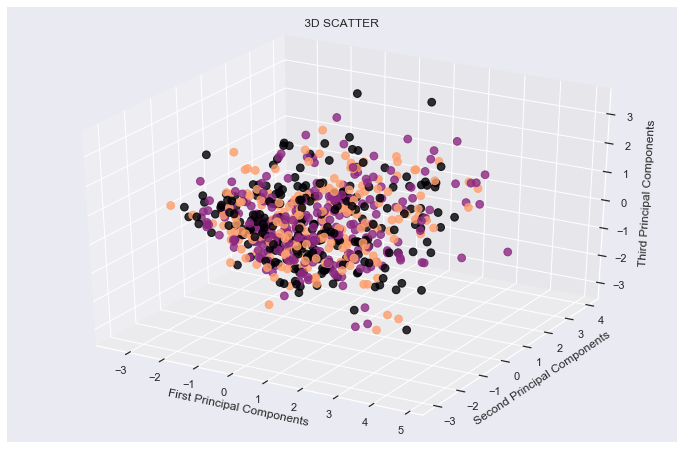

In [19]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (12,8))
ax = plt.axes(projection='3d')

# Generate array for coloring features
color = np.random.random_integers(0, 2, len(y))

ax.scatter3D(PCA_components['PCA-0'], PCA_components['PCA-1'], PCA_components['PCA-2'], c = plt.cm.magma(0.4*color), s = 60, alpha=0.8)

plt.title(" 3D SCATTER ", pad = 15)
ax.set_xlabel('First Principal Components')
ax.set_ylabel('Second Principal Components')
ax.set_zlabel('Third Principal Components')

plt.show()

### Explained Variance

In [20]:
pca.explained_variance_ratio_

array([0.25436753, 0.2327256 , 0.1249369 , 0.11173913, 0.10420907])

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can reduce the dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 25.43% of the variance and the second principal component contains 23.27% of the variance. Together, the two components contain 48.60% of the information.

## Supervised Learning

In [37]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [23]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
tr_split

,Name,Score
0,KNN,0.753623
1,SVC,0.731884
2,LR,0.746377
3,DT,0.717391
4,GNB,0.753623
5,RF,0.739130
6,GB,0.739130


### K-Fold Cross-Validation

We will move forward with K-Fold cross validation as it is more accurate and use the data efficiently. We will train the models using 10 fold cross validation and calculate the mean accuracy of the models.

In [24]:
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
kf_cross_val

,Name,Score
0,KNN,0.748593
1,SVC,0.768926
2,LR,0.787766
3,DT,0.715239
4,GNB,0.752962
5,RF,0.776130
6,GB,0.770375


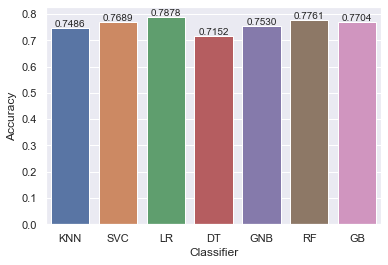

In [25]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

At the baseline Logistic Regression managed to achieve a classification accuracy of 78.78 %. This should be selected as the prime candidate for the next phases.

## Unsupervised Learning By Using KMEANS

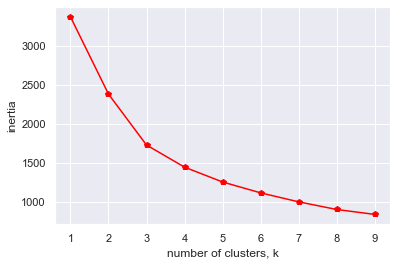

In [26]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='red')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(range(1, 10))
plt.show()

As we can see from above graph, elbow point is looking like 3

Now we know what cluster number should be. So, Let's run K-Means to cluster it, again.

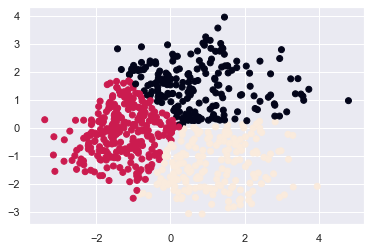

In [27]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components["PCA-0"], PCA_components["PCA-1"], c=labels)
plt.show()

## Association Rule Mining

In [28]:
from apyori import apriori

In [29]:
# X variable contains all columns from dataset but "class" column
rule_x = df.drop('Outcome', axis=1).values

In [30]:
rule_x.shape

(688, 8)

In [31]:
records = []
for i in range(0, 688):
    records.append([str(rule_x[i,j]) for j in range(0, 8)])

In [32]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [33]:
print(len(association_results))

52


In [34]:
print(association_results[0])

RelationRecord(items=frozenset({'1.0', '180.0'}), support=0.007267441860465116, ordered_statistics=[OrderedStatistic(items_base=frozenset({'180.0'}), items_add=frozenset({'1.0'}), confidence=0.5555555555555555, lift=3.0096237970253714)])


In [35]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: 1.0 -> 180.0
Support: 0.007267441860465116
Confidence: 0.5555555555555555
Lift: 3.0096237970253714
Rule: 1.0 -> 97.0
Support: 0.007267441860465116
Confidence: 0.5555555555555555
Lift: 3.0096237970253714
Rule: 11.0 -> 80.0
Support: 0.005813953488372093
Confidence: 0.25
Lift: 4.095238095238096
Rule: 4.0 -> 110.0
Support: 0.005813953488372093
Confidence: 0.3076923076923077
Lift: 3.3601953601953607
Rule: 24.0 -> 112.0
Support: 0.005813953488372093
Confidence: 0.2857142857142857
Lift: 3.3891625615763545
Rule: 115.0 -> 28.0
Support: 0.005813953488372093
Confidence: 0.3076923076923077
Lift: 3.848951048951049
Rule: 62.0 -> 12.0
Support: 0.005813953488372093
Confidence: 0.25
Lift: 4.914285714285715
Rule: 31.0 -> 125.0
Support: 0.005813953488372093
Confidence: 0.23529411764705882
Lift: 3.9483500717360114
Rule: 29.0 -> 126.0
Support: 0.005813953488372093
Confidence: 0.3333333333333333
Lift: 4.879432624113475
Rule: 128.0 -> 24.0
Support: 0.005813953488372093
Confidence: 0.3333333333333333
Li